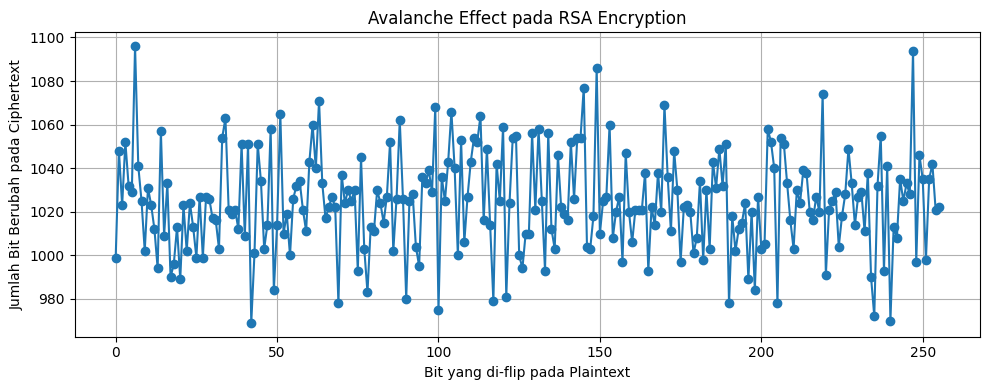

In [1]:
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

RESULTS_PLOTS_DIR = os.path.join(PROJECT_ROOT, 'results', 'plots')
os.makedirs(RESULTS_PLOTS_DIR, exist_ok=True)

import numpy as np
import matplotlib.pyplot as plt
from src.crypto.keygen import generate_rsa_keys
from src.crypto.encrypt import rsa_encrypt

# 1. Generate RSA keys (gunakan file yang sama agar konsisten)
priv_path, pub_path = generate_rsa_keys(2048, 'keys/private.pem', 'keys/public.pem')

# 2. Siapkan plaintext awal
msg_len = 32  # bytes
plaintext = np.random.randint(0, 256, msg_len, dtype=np.uint8)

avalanche = []
bit_indices = range(msg_len * 8)

for bit in bit_indices:
    # Flip 1 bit pada plaintext
    mod_plain = plaintext.copy()
    byte_idx = bit // 8
    bit_idx = bit % 8
    mod_plain[byte_idx] ^= (1 << bit_idx)

    # Encrypt keduanya
    ct1 = rsa_encrypt(bytes(plaintext), pub_path)
    ct2 = rsa_encrypt(bytes(mod_plain), pub_path)

    # Hitung avalanche effect (jumlah bit berbeda)
    ct1_bits = np.unpackbits(np.frombuffer(ct1, dtype=np.uint8))
    ct2_bits = np.unpackbits(np.frombuffer(ct2, dtype=np.uint8))
    diff = np.sum(ct1_bits != ct2_bits)
    avalanche.append(diff)

# 3. Plot hasilnya
plt.figure(figsize=(10,4))
plt.plot(list(bit_indices), avalanche, marker='o')
plt.title("Avalanche Effect pada RSA Encryption")
plt.xlabel("Bit yang di-flip pada Plaintext")
plt.ylabel("Jumlah Bit Berubah pada Ciphertext")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PLOTS_DIR, 'avalanche_effect.png'))
plt.show()